# 📊 911 Call Volume by Type

Let's explore the time series for each 911 call type. Understanding trends by call type can inform several critical decisions in public service and healthcare operations.

---

## 🚑 Why does this matter?

- **Staffing call agents**  
  Anticipating increases and dips in call volume helps ensure there are enough dispatchers to respond quickly, and can help save money when demand is lower.

- **Staffing care providers**  
  Knowing which types of calls increase seasonally or daily (ex: overdoses, fires, assaults) supports scheduling nurses, EMTs, and ER doctors appropriately.

- **Purchasing and allocating resources**  
  Agencies can proactively purchase medical supplies, equipment, or transportation resources (like ambulances) based on call patterns.

---

# You can find the data here
# Link to data https://opendata.minneapolismn.gov/datasets/cityoflakes::incidents-reported-911/about

In [1]:
import pandas as pd

# My file path is kept secret in a .env file since we are posting this online

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
myfilepath=os.getenv("MY_SECRET_CSV_PATH")


In [3]:
df=pd.read_csv(myfilepath)

In [4]:
df.columns

Index(['X', 'Y', 'Master_Incident_Number', 'Agency_Type', 'is_911_Call',
       'Is_City_Call', 'Initial_Problem', 'Problem__Final_',
       'Initial_Priority', 'Final_Priority', 'Division', 'Jurisdiction',
       'Response_Date', 'Call_Disposition', 'Latitude', 'Longitude',
       'MPD_Response', 'Park_Police_Response', 'U_of_M_Response',
       'Other_Agency_Response', 'Ward__GIS_', 'Neighborhood__GIS_',
       'OBJECTID'],
      dtype='object')

# Let's take a peek at the data

In [5]:
df

,X,Y,Master_Incident_Number,Agency_Type,is_911_Call,Is_City_Call,Initial_Problem,Problem__Final_,Initial_Priority,Final_Priority,...,Call_Disposition,Latitude,Longitude,MPD_Response,Park_Police_Response,U_of_M_Response,Other_Agency_Response,Ward__GIS_,Neighborhood__GIS_,OBJECTID
0,-93.23150,44.99516,19-0006538,FIRE,Yes,Y,Overdose-Accidental (E),Overdose-Accidental (E),1.0,1.0,...,NaN,44.99516,-93.23150,NaN,NaN,NaN,NaN,1.0,Mid - City Industrial,1
1,-93.27406,44.95463,19-0006544,FIRE,Yes,Y,Heart (FE),Heart (FE),1.0,1.0,...,NaN,44.95463,-93.27406,NaN,NaN,NaN,NaN,10.0,Whittier,2
2,-93.25052,44.95734,19-0006548,FIRE,Yes,Y,Personal Injury Accident (FE),Personal Injury Accident (FE),1.0,1.0,...,NaN,44.95734,-93.25052,NaN,NaN,NaN,NaN,9.0,East Phillips,3
3,-93.28989,45.00773,19-0006555,FIRE,Yes,Y,Shortness of Breath (FE),Shortness of Breath (FE),1.0,1.0,...,NaN,45.00773,-93.28989,NaN,NaN,NaN,NaN,5.0,Hawthorne,4
4,-93.29275,44.90690,19-0006558,FIRE,Yes,Y,F Alarm-Residential-Single (F),F Alarm-Residential-Single (F),1.0,1.0,...,NaN,44.90690,-93.29275,NaN,NaN,NaN,NaN,13.0,Lynnhurst,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614359,-93.27792,44.94214,20-262901,POLICE,Yes,Y,Check the Welfare (P),Check the Welfare (P),2.0,2.0,...,GOA-Gone on Arrival,44.94214,-93.27792,Y,N,N,N,8.0,Lyndale,1614360
1614360,-93.24444,44.98264,20-261910,POLICE,Yes,Y,Suspicious Person (P),Suspicious Person (P),2.0,2.0,...,GOA-Gone on Arrival,44.98264,-93.24444,Y,N,N,N,3.0,Marcy Holmes,1614361
1614361,-93.28051,44.94293,20-262903,POLICE,Yes,Y,Emotionally Disturb Person (P),Emotionally Disturb Person (P),1.0,1.0,...,CNL-Cancel,44.94293,-93.28051,Y,N,N,N,8.0,Lyndale,1614362
1614362,-93.26511,44.96458,20-261912,POLICE,Yes,Y,Crim Sex Conduct/Report (P),Crim Sex Conduct/Report (P),2.0,2.0,...,RPT-Report,44.96458,-93.26511,Y,N,N,N,6.0,Ventura Village,1614363


# We use a lot of chaining to make this work: ".\\" basically allows us to pipe the results of our last method call into the next method call

<Axes: title={'center': 'Minneapolis 911 Call Volume'}, xlabel='Response_Date'>

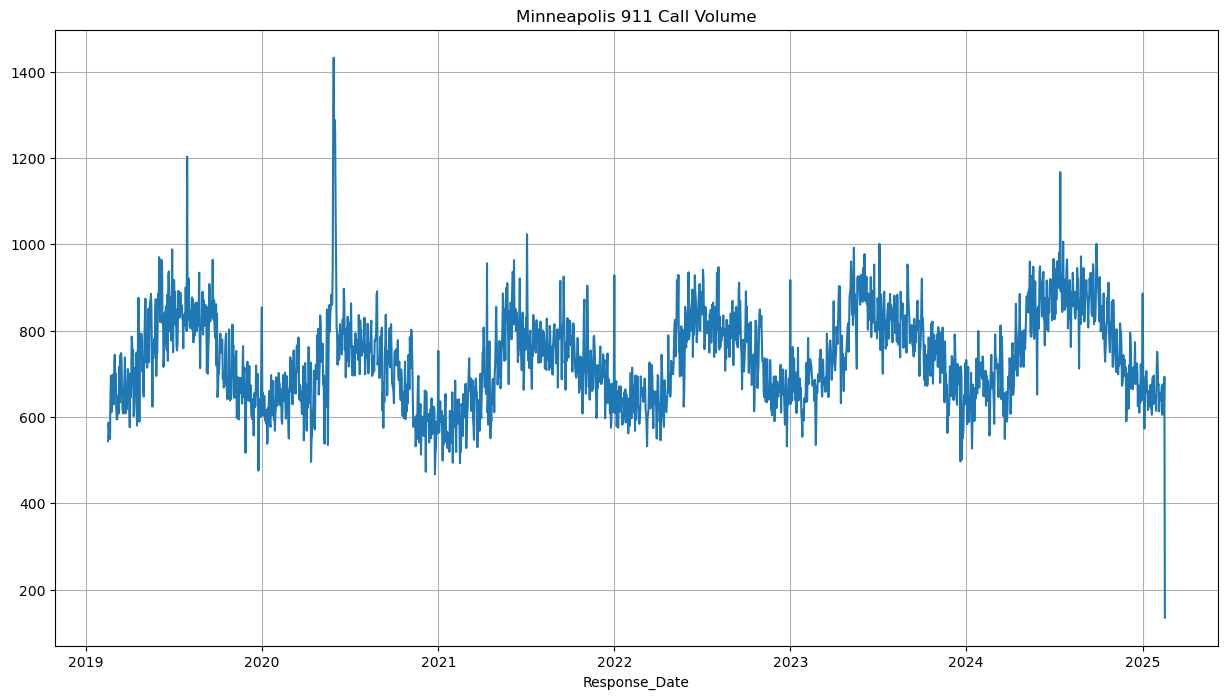

In [6]:
#convet the time stamps to dates by first converting the time stamps to datetime objects and then calling the "date" "method"
#count each date, we get back a series that has dates in the index
#sort our date index
# make our plot
pd.to_datetime(df['Response_Date']).dt.date.\
    value_counts().\
    sort_index().\
    plot(figsize=(15,8),grid=True,title='Minneapolis 911 Call Volume') 

# Ok so 911 calls have an interesting shape, what if we broke them down by type?

<Axes: ylabel='Initial_Problem'>

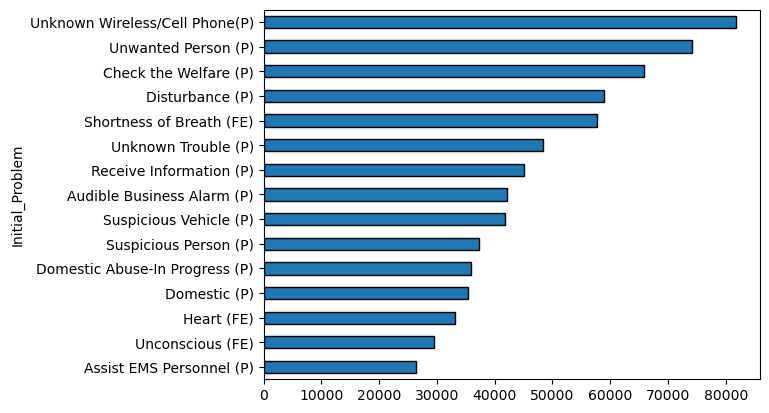

In [7]:
df['Initial_Problem'].value_counts().head(15).sort_values().plot(kind='barh',edgecolor='black')

In [8]:
df['Initial_Problem'].value_counts().head(15) #the output below is a series object, the call types are the index values

Initial_Problem
Unknown Wireless/Cell Phone(P)    81785
Unwanted Person (P)               74085
Check the Welfare (P)             65771
Disturbance (P)                   58966
Shortness of Breath (FE)          57728
Unknown Trouble (P)               48335
Receive Information (P)           44996
Audible Business Alarm (P)        42205
Suspicious Vehicle (P)            41778
Suspicious Person (P)             37236
Domestic Abuse-In Progress (P)    35873
Domestic (P)                      35423
Heart (FE)                        33124
Unconscious (FE)                  29464
Assist EMS Personnel (P)          26363
Name: count, dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

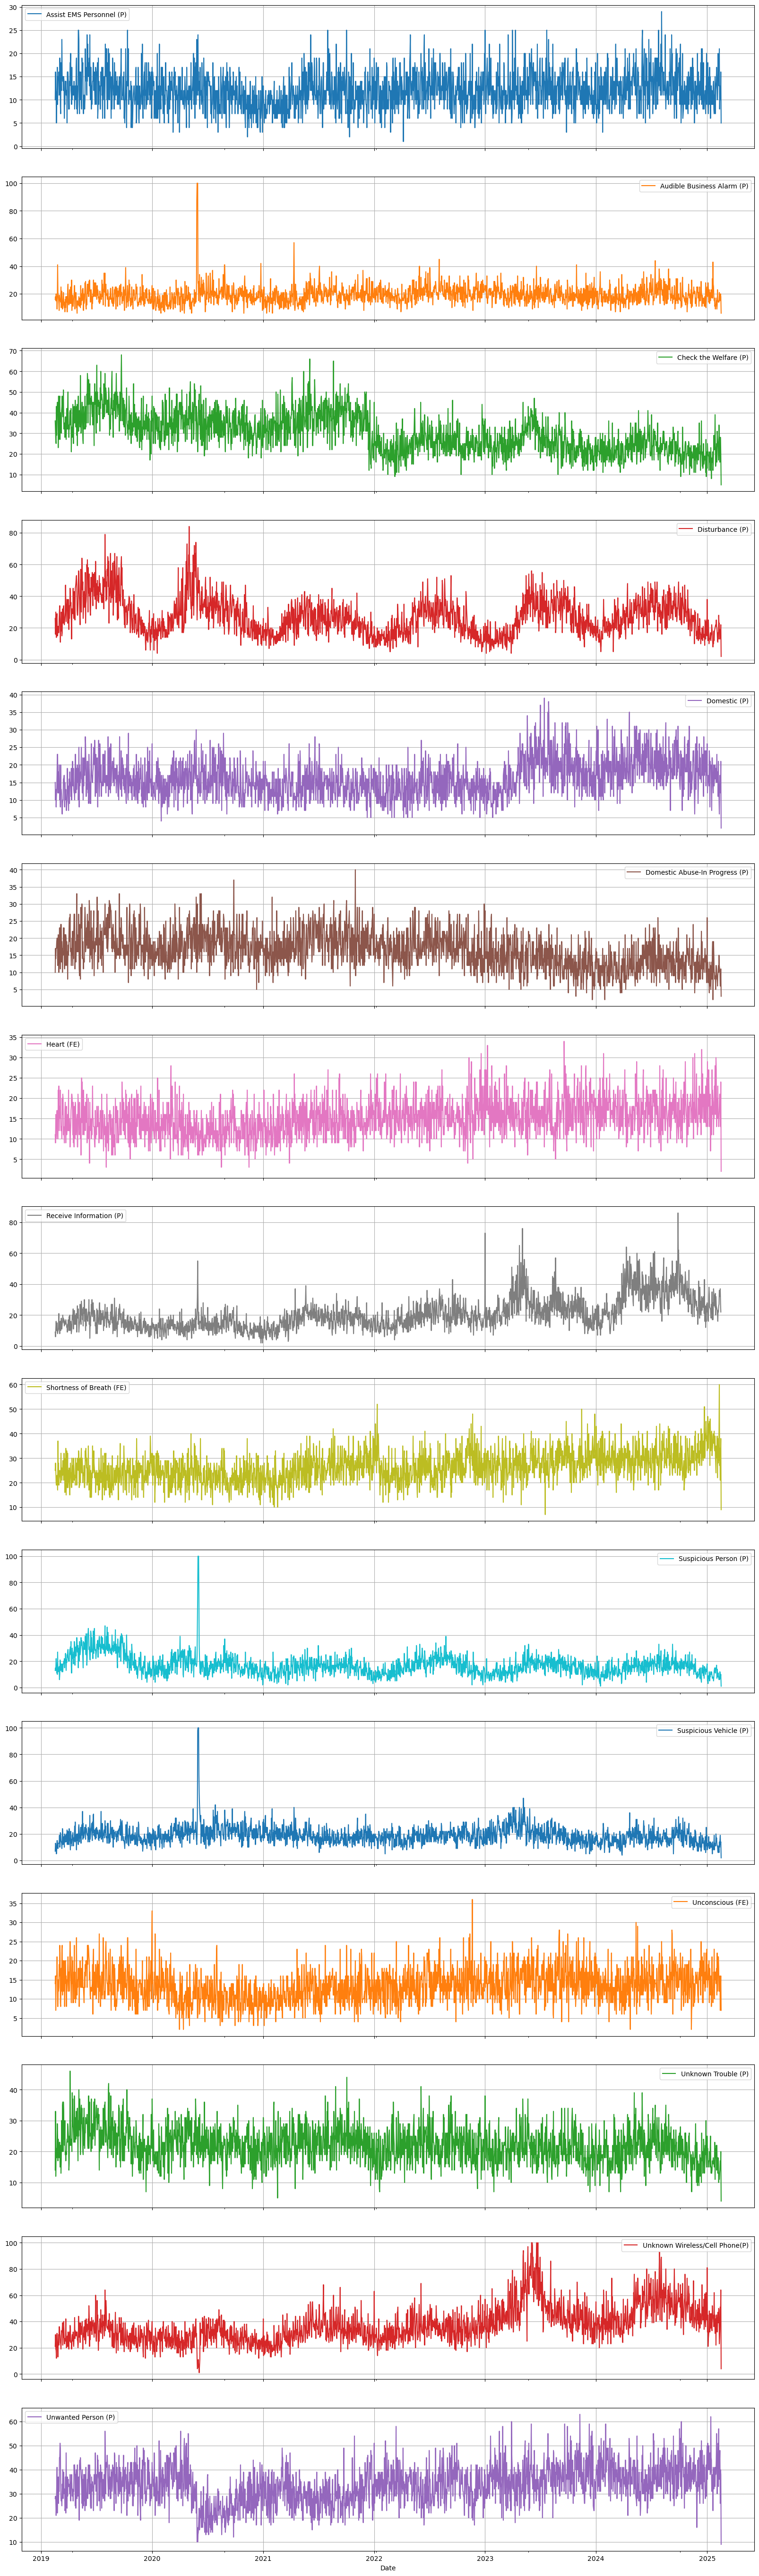

In [9]:
t10=df['Initial_Problem'].value_counts().head(15).index.tolist() # if we pull out the index values and put them in a list we can use that for filtering later
df['Date']=pd.to_datetime(df['Response_Date']).dt.date
df[df['Initial_Problem'].isin(t10)].groupby(['Date','Initial_Problem']).size().clip(0,100).unstack().plot(figsize=(20,70),subplots=True,grid=True) #Here is where we do that filtering
#then we get counts for every combination of Date and Initial_Problem, "size" works the way you think count would in this context.
#calling clip trims your data, here we are capping outliers at 100 so we dont skew the charts too much. Note that subplots=True is doing the heavy lifting for us here, just giving us a chart for each group. pretty nifty. 